# Linear Regression Assignment


# Context
There is a huge demand for used cars after the COVID-19 pandemic. Dealership are still uncertain about both the pricing and supply of used cars compared to pre-COVID era. In this project, I build a regression model to predict the future prices of used cars that a dealership can rely on for model prediction. 

# Key Questions
1. Key features in effectively predicting the price of the used cars? 
2. Best accuracy score of a good predictive model?
3. Best price for used cars a dealership will never sell any car less than that?

# Data Description  

1. S.No. : Serial Number
2. Name : Name of the car which includes Brand name and Model name
3. Location : The location in which the car is being sold or is available for purchase Cities
4. Year : Manufacturing year of the car
5. Kilometers_driven : The total kilometers driven in the car by the previous owner(s) in KM.
6. Fuel_Type : The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)
7. Transmission : The type of transmission used by the car. (Automatic / Manual)
8. Owner : Type of ownership
9. Mileage : The standard mileage offered by the car company in kmpl or km/kg
0. Engine : The displacement volume of the engine in CC.
1. Power : The maximum power of the engine in bhp.
2. Seats : The number of seats in the car.
3. New_Price : The price of a new car of the same model in INR Lakhs.(1 Lakh = 100, 000)
4. Price : The price of the used car in INR Lakhs (1 Lakh = 100, 000)

## Python Good Coding Practice

In [53]:
# this will help in making the Python code more structured automatically
# (good coding practice)
%load_ext nb_black

<IPython.core.display.Javascript object>

# Needed Libraries

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

import warnings

warnings.filterwarnings("ignore")

# removing the limit from the number of displayed columns and rows
pd.set_option("display.max_columns", None)

# displaying 200 rows of the data frame, the default  is much smaller
pd.set_option("display.max_rows", 200)

# building linear regression model for prediction
from sklearn.linear_model import LinearRegression

# checking model performance
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

<IPython.core.display.Javascript object>

# Loading Data

In [55]:
df = pd.read_csv("UsedCars.csv")

<IPython.core.display.Javascript object>

# Basic Properties of Data

In [56]:
# to view first 5 rows of the dataset
df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


<IPython.core.display.Javascript object>

In [57]:
df.tail()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7252,7252,Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...,Kochi,2014,72443,Diesel,Automatic,First,10.0 kmpl,2148 CC,170 bhp,5.0,NaN,NaN


<IPython.core.display.Javascript object>

In [58]:
df.shape

(7253, 14)

<IPython.core.display.Javascript object>

Observation: The dataset has 14 columns and 7253 rows.

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


<IPython.core.display.Javascript object>

Observations: 
The dependent variable is price which is a float. 
There are missing values in : Mileage, Engine, Power, Seats, New Price and Price. 
Name, Location, Fuel_Type, Transmission, Owner_Type, Mileage, Engine and Power are Object D-Type. 
All other columns are numerical.

In [60]:
print(df.columns)

Index(['S.No.', 'Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price'],
      dtype='object')


<IPython.core.display.Javascript object>

In [61]:
df.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
New_Price            6247
Price                1234
dtype: int64

<IPython.core.display.Javascript object>

Observations: 
Mileage has 2 missing values.
Engine and Power have 46 missing values.
Seats has 53 missing values.
New_Price has 6247 missing values and Price has 1234 missing values.

# Exploring the Data (EDA)

# Data Pre-processing
1. Handling data types
2. Handling missing values
3. Handling outliers

In [62]:
# EXTRACTING NUMERIC VALUES FROM THE MILEAGE, ENGINE AND POWER VARIABLES
df["Mileage"] = df["Mileage"].str.extract("(\d+)", expand=False)
df["Engine"] = df["Engine"].str.extract("(\d+)", expand=False)
df["Power"] = df["Power"].str.extract("(\d+)", expand=False)

<IPython.core.display.Javascript object>

In [63]:
# This field is not relevant to the analysis, most values are missing.
df.drop("New_Price", axis=1, inplace=True)
df.drop("S.No.", axis=1, inplace=True)


<IPython.core.display.Javascript object>

In [64]:
# If a record doesn't have an entry to Price the record will not be useful for this study.
df.dropna(subset=["Price"], inplace=True)
# Dropping records that have NA's
df.dropna(inplace=True)

<IPython.core.display.Javascript object>

In [65]:
# Changing variable d-types to numeric
df["Mileage"] = pd.to_numeric(df["Mileage"])
df["Engine"] = df["Engine"].astype(int)
df["Power"] = pd.to_numeric(df["Power"])

<IPython.core.display.Javascript object>

In [66]:
# taking the make from the name column and creating a field that shows only the make
df["Make"] = df["Name"].str.split().str[0]

<IPython.core.display.Javascript object>

In [67]:
# This field is no longer needed as the we created the Make field
df.drop("Name", axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [68]:
# We need to fix the ISUZUs.
df.replace("ISUZU", "Isuzu", inplace=True)

<IPython.core.display.Javascript object>

In [69]:
# The fields Location, Fuel_Type, Transmission, Owner_Type, and Make are all categorical variables which will
# need to be converted to intergers/ dummy variables. Looking at all unique values in these variables.
fields_list = ["Location", "Fuel_Type", "Owner_Type", "Make"]


for i in fields_list:
    print("Unique values in", i, "are :")
    print(df[i].value_counts())
    print("*" * 50)

Unique values in Location are :
Mumbai        775
Hyderabad     718
Kochi         645
Coimbatore    629
Pune          594
Delhi         545
Kolkata       521
Chennai       476
Jaipur        402
Bangalore     347
Ahmedabad     220
Name: Location, dtype: int64
**************************************************
Unique values in Fuel_Type are :
Diesel    3152
Petrol    2655
CNG         55
LPG         10
Name: Fuel_Type, dtype: int64
**************************************************
Unique values in Owner_Type are :
First             4839
Second             925
Third              101
Fourth & Above       7
Name: Owner_Type, dtype: int64
**************************************************
Unique values in Make are :
Maruti           1175
Hyundai          1058
Honda             600
Toyota            394
Mercedes-Benz     316
Volkswagen        314
Ford              294
Mahindra          268
BMW               262
Audi              235
Tata              183
Skoda             172
Renault         

<IPython.core.display.Javascript object>

Observations: 
Most of the cars location are : Mumbai, Hyderabad, and Kochi.
Most cars fuel_type are diesel and petrol. 
Most of the cars have only had one owner. 
Most car make in this dataset are Maruti, Hyundai and Honda. 

In [70]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,5872.0,2013.477691,3.164568,1998.00,2012.0000,2014.00,2016.00,2019.0
Kilometers_Driven,5872.0,58316.999149,92169.410006,171.00,33422.5000,52609.00,72402.75,6500000.0
Mileage,5872.0,17.849796,4.375212,0.00,15.0000,18.00,21.00,33.0
Engine,5872.0,1625.745572,601.641783,624.00,1198.0000,1495.50,1991.00,5998.0
Power,5872.0,112.961853,53.924304,34.00,75.0000,97.00,138.00,560.0
Seats,5872.0,5.283719,0.805081,2.00,5.0000,5.00,5.00,10.0
Price,5872.0,9.603919,11.249453,0.44,3.5175,5.75,10.00,160.0


<IPython.core.display.Javascript object>

Observations: 
We can see that price ranges from 0.44 - 160.0 Lakhs. 1 Lakhs = 100,000.
50%  of the cars have been driven less than or equal to 33422.5 kilometers.
75% of the cars have a engine volume less than or equal to 1991CCss.
75% of the cars have a max engine power less than or equal to 138bhps. 
75% of the cars has 5 or less seats.

In [71]:
# Mileage variable min of 0 doesnt make sense,
# therefore, I'm interpolating with the average mileage
df.loc[df["Mileage"] == 0, "Mileage"] = round(df["Mileage"].mean())

<IPython.core.display.Javascript object>

# Data Visualization

## Univariate Analysis

In [72]:
# This function takes the numerical column as the input and returns the
# boxplots and histograms for the variable.


def histogram_boxplot(feature, figsize=(15, 10), bins=None):
    """Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        feature, ax=ax_box2, showmeans=True, color="green"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(
        feature, kde=F, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.distplot(
        feature, kde=False, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        feature.mean(), color="red", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        feature.median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

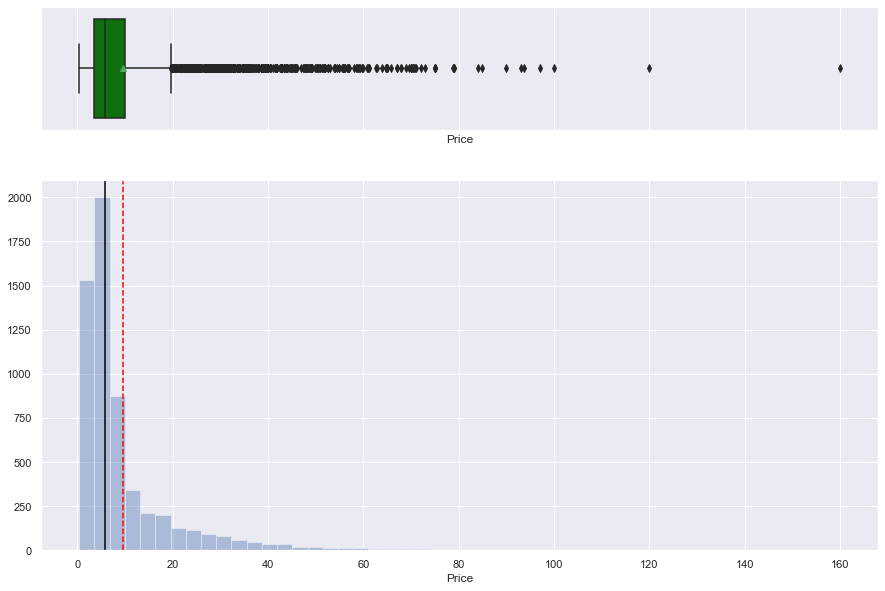

<IPython.core.display.Javascript object>

In [73]:
# Price (Target variable)
histogram_boxplot(df["Price"])

Observation- The distribution is right skewed, which shows that most cars are less thank or equal to 10 Lakhs. 

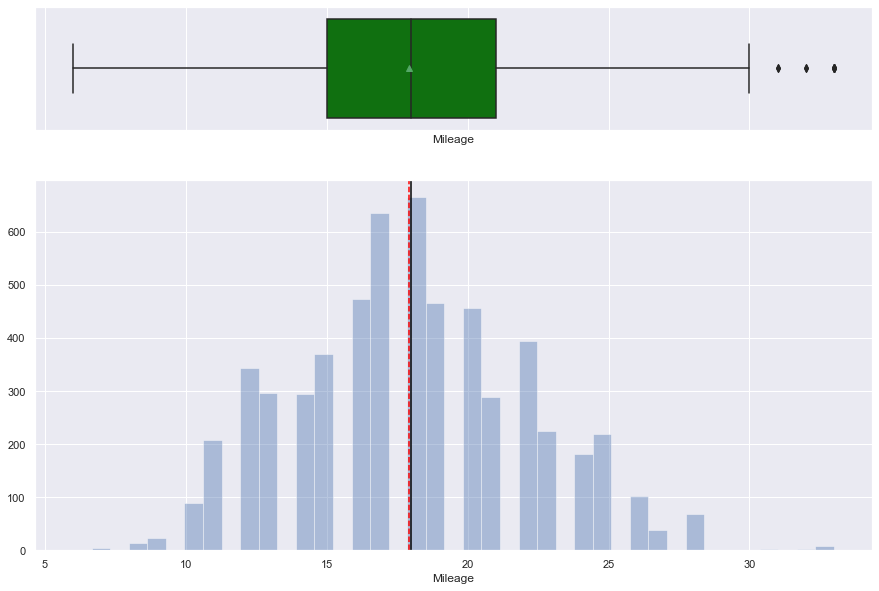

<IPython.core.display.Javascript object>

In [74]:
# Looking into the Mileage variable
histogram_boxplot(df["Mileage"])

Observation- Mileage is close to normal distribution. 

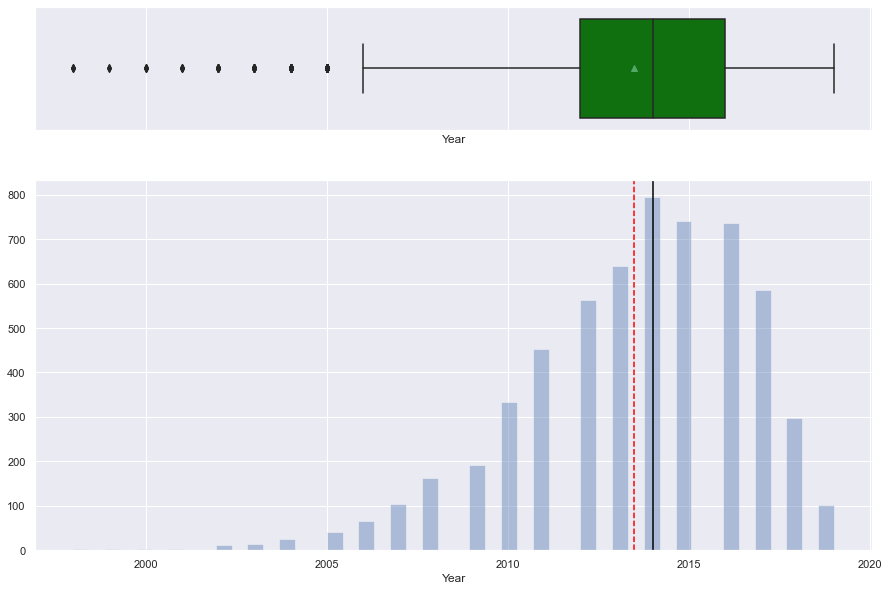

<IPython.core.display.Javascript object>

In [75]:
# Looking into the Year variable
histogram_boxplot(df["Year"])

Observation: Year is left skewed, most cars have been manufactured from 2014 to 2016.

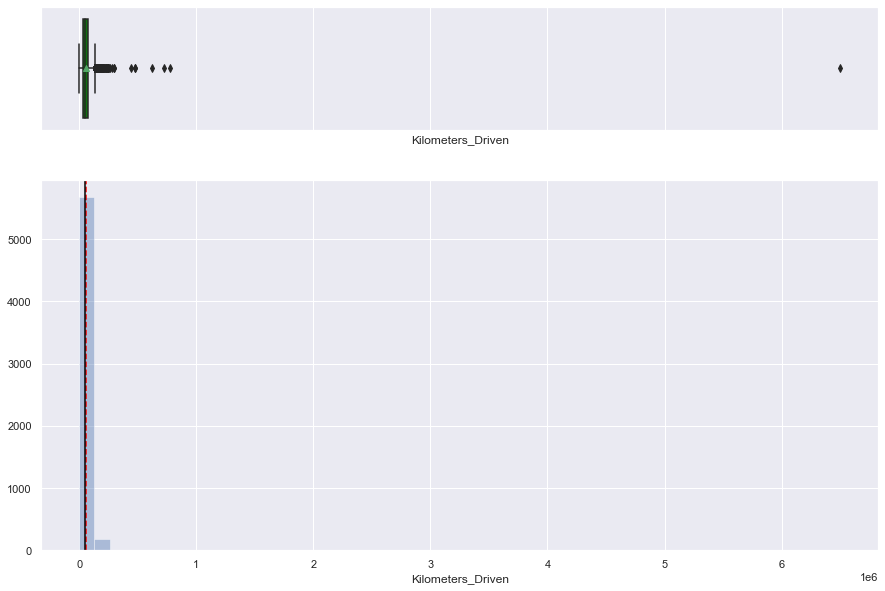

<IPython.core.display.Javascript object>

In [76]:
# Looking into the Kilometers_Driven variable
histogram_boxplot(df["Kilometers_Driven"])

Observation: Kilometers driven is heavily right skewed. 

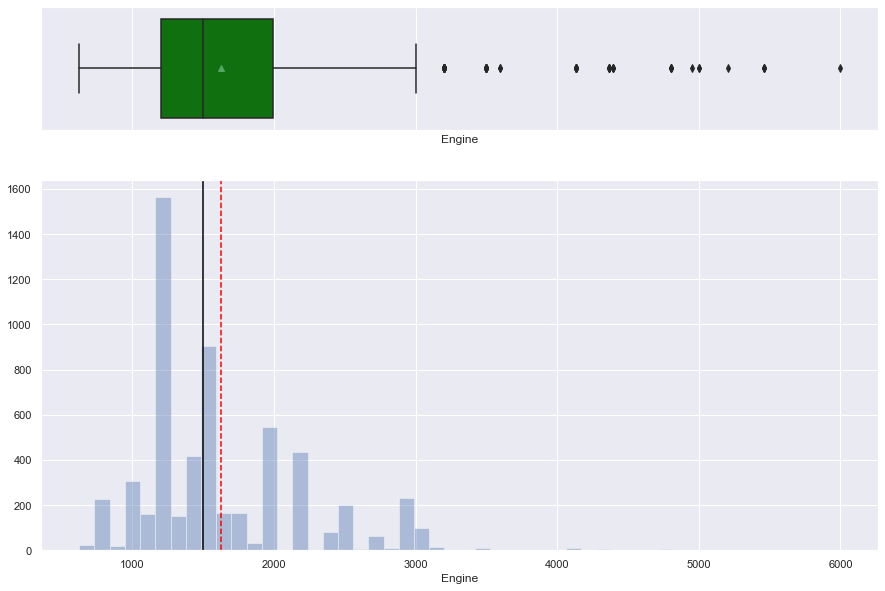

<IPython.core.display.Javascript object>

In [77]:
# Looking into the Engine variable
histogram_boxplot(df["Engine"])

Observation- Engine is right skewed with an an average of aroudn 1600CC's.

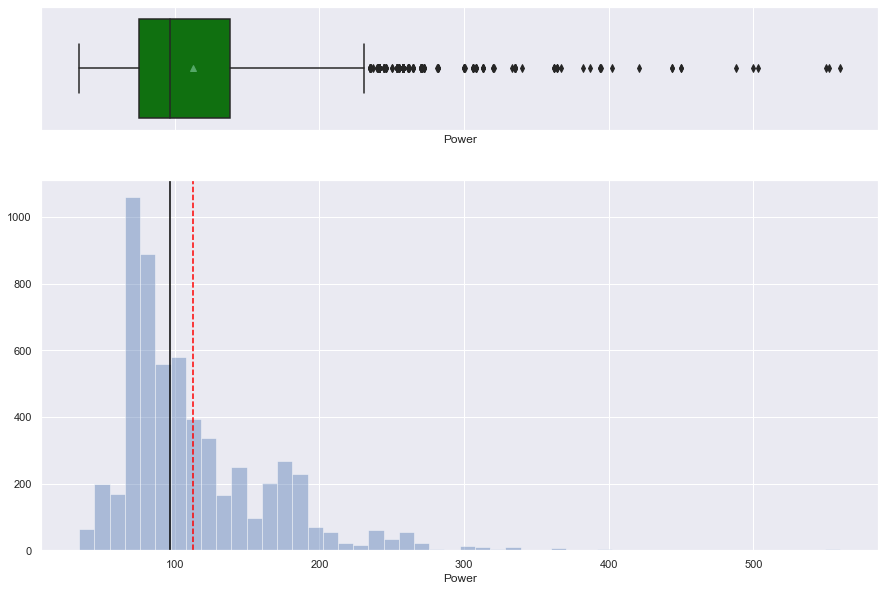

<IPython.core.display.Javascript object>

In [78]:
# Looking into the Power variable
histogram_boxplot(df["Power"])

Observation- Power is right skewed with an average of around 115bhps. 

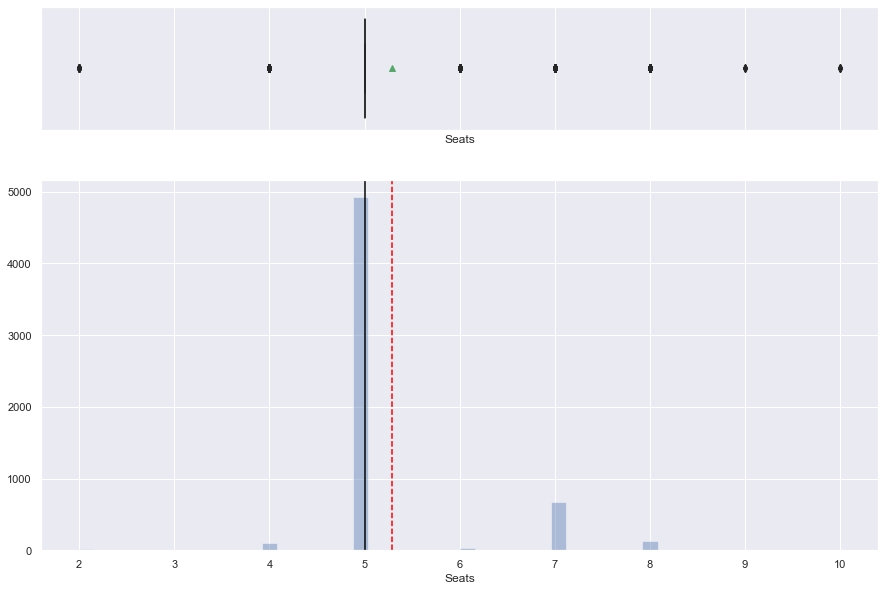

<IPython.core.display.Javascript object>

In [79]:
# Looking into the Seats variable
histogram_boxplot(df["Seats"])

Observation- Average number of seat is close to 5, heavily right skewed. 

## Bivariate analysis

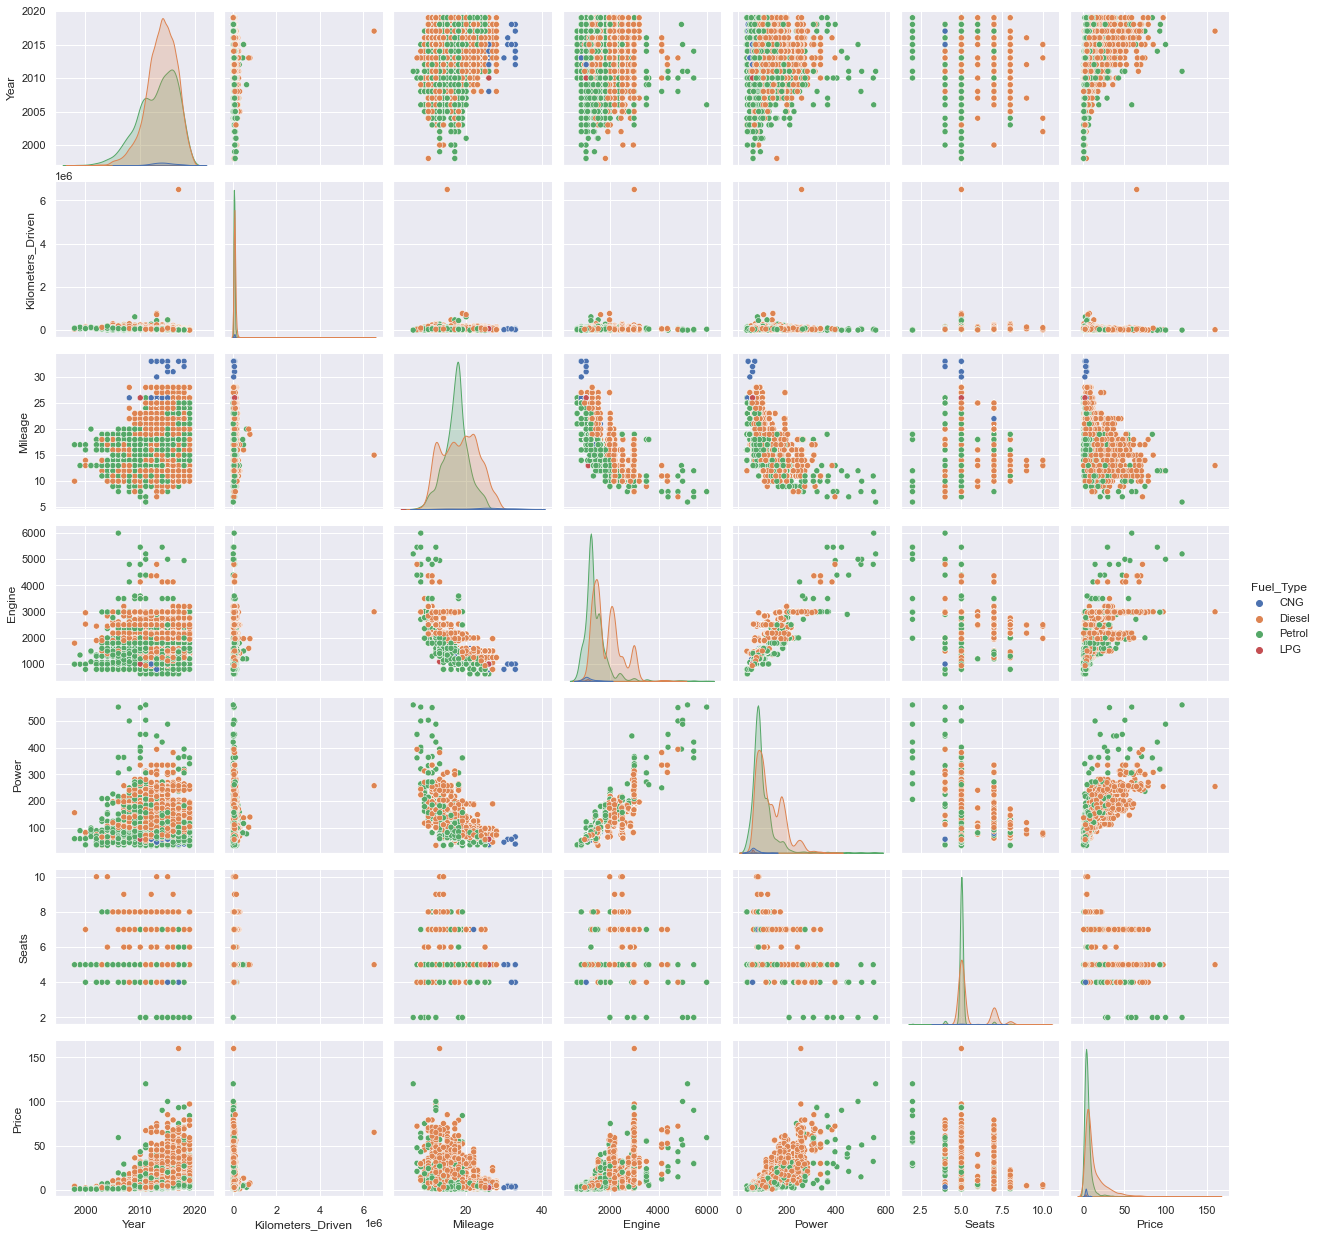

In [24]:
sns.pairplot(df, hue="Fuel_Type")

Observations: 
Price is positively correlated to Year, the hue determines fuel type; therefore we can see that pratically all manufactured cars are Diesel or petrol. Price is alsp positively correlated with Engine, Power and seats. We can also see that price is negatively correlated to mileage and kilometers driven.

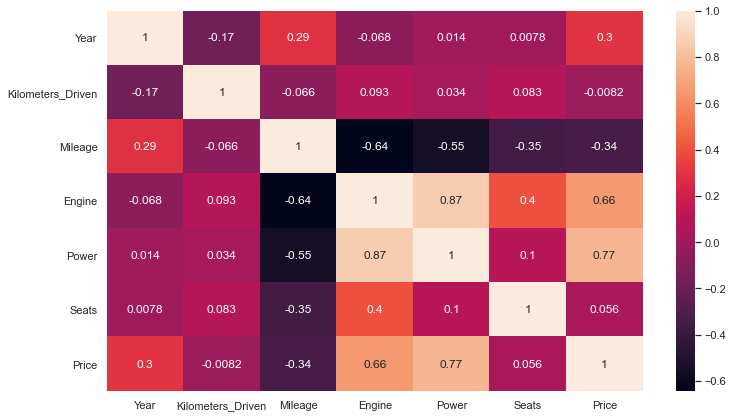

In [25]:
# checking correlations before applying log transformations
plt.figure(figsize=(12, 7))
sns.heatmap(df.corr(), annot=True)
plt.show()

Observations- Price is positively correlated to Year, Engine, Power and Seats. 
Price is negatively correlated to kilometers driven and Mileage. 

# Log Transformations

### Checking numeric columns for skewness
- Some columns are very skewed and will likely behave better on the log scale

### Skewness before log transformations

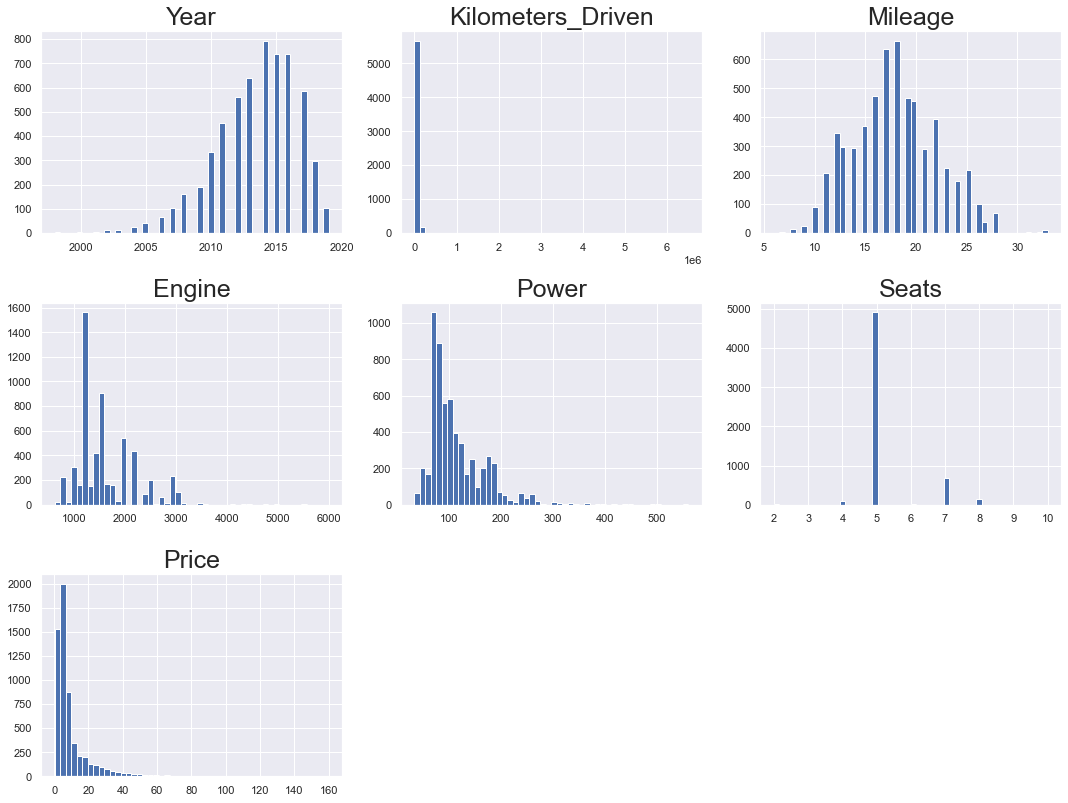

In [26]:
# creating a list of numeric columns
num_cols = [item for item in df.select_dtypes(include=np.number).columns]


# now, let's plot a histogram of all numeric columns
plt.figure(figsize=(15, 45))

for i in range(len(num_cols)):
    plt.subplot(12, 3, i + 1)
    plt.hist(df[num_cols[i]], bins=50)
    # sns.histplot(data=df3, x=dist_cols[i], kde=True)
    plt.tight_layout()
    plt.title(num_cols[i], fontsize=25)

plt.show()

- As seen, most of the columns have a very skewed distribution
- Since Mileage and Seats have normal distributions, and Price being the target variable, we can apply the log transformation to the rest columns to deal with skewness in the data

In [27]:
# creating a list of skewed columns
num_cols.remove("Mileage")
num_cols.remove("Price")
num_cols.remove("Seats")

In [28]:
num_cols

['Year', 'Kilometers_Driven', 'Engine', 'Power']

In [29]:
# applying log transforms on num_cols columns

for col in num_cols:
    df[col + "_log"] = np.log(df[col] + 1)

# dropping the original columns
df.drop(num_cols, axis=1, inplace=True)
df.head()

,Location,Fuel_Type,Transmission,Owner_Type,Mileage,Seats,Price,Make,Year_log,Kilometers_Driven_log,Engine_log,Power_log
0,Mumbai,CNG,Manual,First,26,5.0,1.75,Maruti,7.606387,11.184435,6.906755,4.077537
1,Pune,Diesel,Manual,First,19,5.0,12.50,Hyundai,7.608871,10.621352,7.367077,4.844187
2,Chennai,Petrol,Manual,First,18,5.0,4.50,Honda,7.606885,10.736418,7.090077,4.488636
3,Chennai,Diesel,Manual,First,20,7.0,6.00,Maruti,7.607381,11.373675,7.130099,4.488636
4,Coimbatore,Diesel,Automatic,Second,15,5.0,17.74,Audi,7.607878,10.613271,7.585281,4.948760


In [30]:
df.shape

(5872, 12)

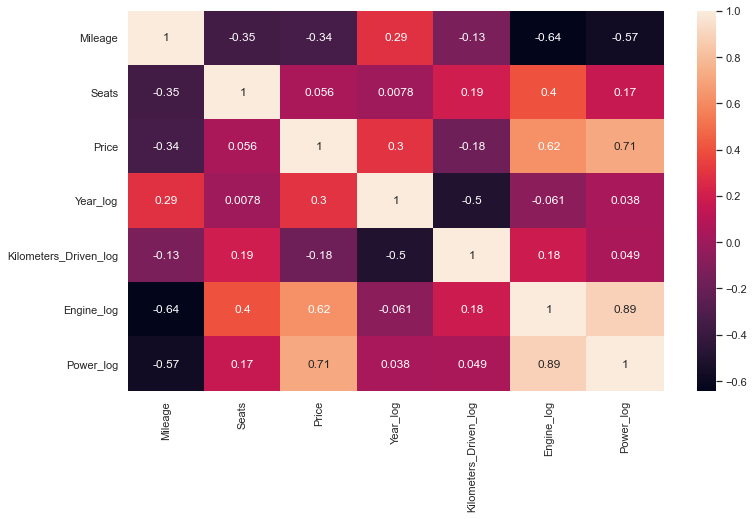

In [31]:
# checking correlations after applying log transformations
plt.figure(figsize=(12, 7))
sns.heatmap(df.corr(), annot=True)
plt.show()

Observations- After applying the log transformations, mileage and kilometers driven are negatively correlated to price; while seats, year, engine and power are positively correlated. 

### Skewness after applying log transformations

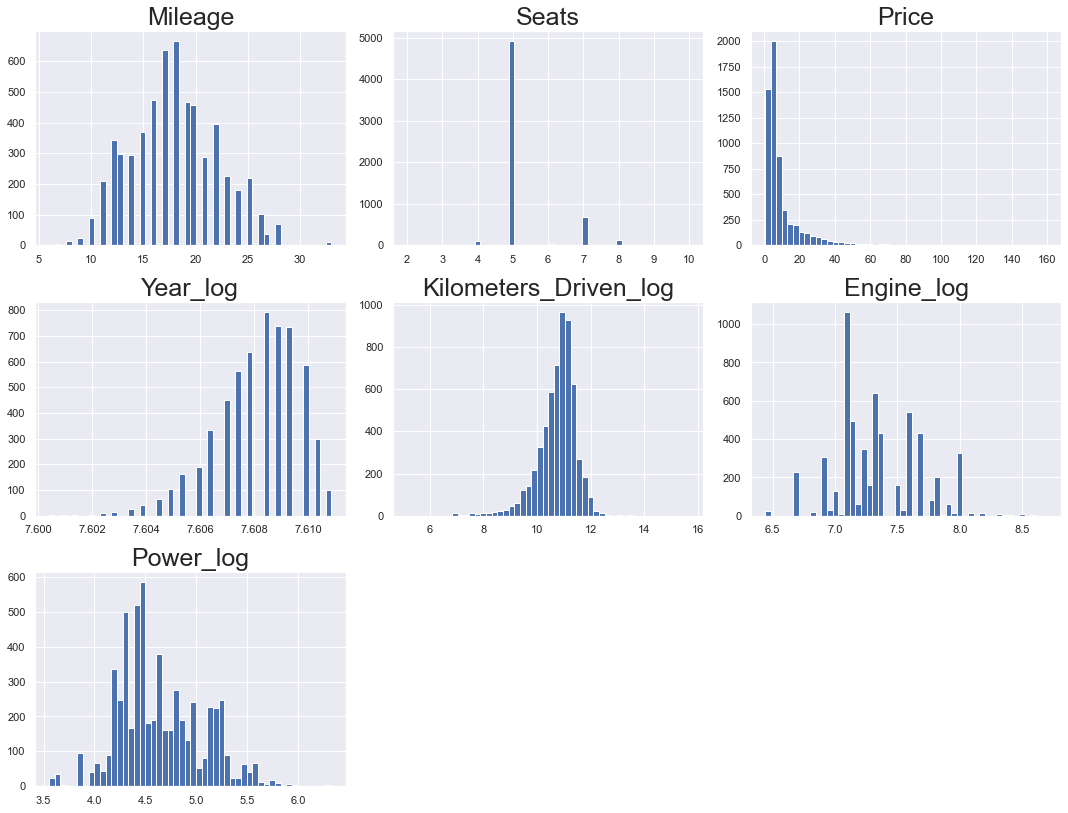

In [32]:
# creating a list of numeric columns
num_cols = [item for item in df.select_dtypes(include=np.number).columns]


# now, let's plot a histogram of all numeric columns
plt.figure(figsize=(15, 45))

for i in range(len(num_cols)):
    plt.subplot(12, 3, i + 1)
    plt.hist(df[num_cols[i]], bins=50)
    # sns.histplot(data=df3, x=dist_cols[i], kde=True)
    plt.tight_layout()
    plt.title(num_cols[i], fontsize=25)

plt.show()

- The columns are still skewed, but not as heavily as before log transformations

- There aren't that highly correlated columns to drop any column 

In [33]:
df.shape

(5872, 12)

# Outliers 

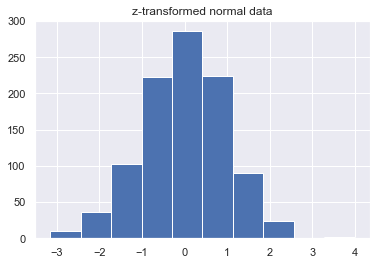

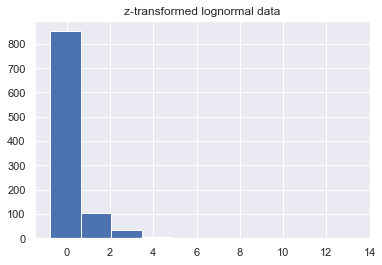

In [34]:
def z_transform(x):
    return (x - np.mean(x)) / np.std(x)


np.random.seed(1)
x1 = np.random.normal(size=1000)
x2 = np.random.lognormal(size=1000)


plt.hist(z_transform(x1))
plt.title("z-transformed normal data")
plt.show()


plt.hist(z_transform(x2))
plt.title("z-transformed lognormal data")
plt.show()

In [35]:
def frac_outside_1pt5_IQR(x):
    length = 1.5 * np.diff(np.quantile(x, [0.25, 0.75]))
    return np.mean(np.abs(x - np.median(x)) > length)


print(frac_outside_1pt5_IQR(x1))
print(frac_outside_1pt5_IQR(x2))

0.05
0.132


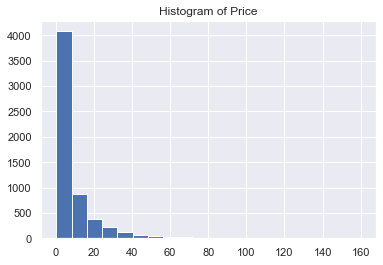

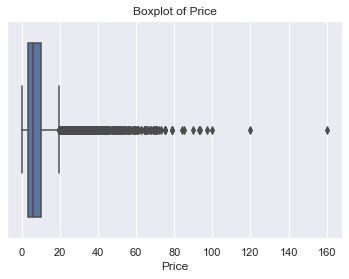

In [38]:
# let's for example look at Price 
plt.hist(df["Price"], 20)
plt.title("Histogram of Price")
plt.show()

sns.boxplot(df["Price"])
plt.title("Boxplot of Price")
plt.show()

In [83]:
# let's see how to handle outliers to see the sensitivity to outliers

<IPython.core.display.Javascript object>

In [42]:
quartiles = np.quantile(df["Price"][df["Price"].notnull()], [0.25, 0.75])
power_4iqr = 4 * (quartiles[1] - quartiles[0])
print(f"Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, 4*IQR = {power_4iqr}")
outlier_powers = df.loc[
    np.abs(df["Price"] - df["Price"].median()) > power_4iqr, "Price"
]
outlier_powers

Q1 = 3.5175, Q3 = 10.0, 4*IQR = 25.93


67       35.67
92       39.58
134      54.00
148      37.00
168      45.00
         ...  
5919    100.00
5921     36.00
5927     45.52
5946     48.00
6008     45.00
Name: Price, Length: 318, dtype: float64

Observation- the above shows outliers outside of Q1 and Q3. So 4*IQR range is 25.93. Our "fence" will be 25.93 points below Q1 and 25.93 points above Q3. IQR = 6.4825, Lower fence = 3.5175 - 25.93 = -22.4125 and upperfence = 10+ 25.93= 35.93. Any observations less than 0 or greater than 35.93 are outliers in the variable price. 

# Model Building

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5872 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Location               5872 non-null   object 
 1   Fuel_Type              5872 non-null   object 
 2   Transmission           5872 non-null   object 
 3   Owner_Type             5872 non-null   object 
 4   Mileage                5872 non-null   int64  
 5   Seats                  5872 non-null   float64
 6   Price                  5872 non-null   float64
 7   Make                   5872 non-null   object 
 8   Year_log               5872 non-null   float64
 9   Kilometers_Driven_log  5872 non-null   float64
 10  Engine_log             5872 non-null   float64
 11  Power_log              5872 non-null   float64
dtypes: float64(6), int64(1), object(5)
memory usage: 596.4+ KB


### Defining independent and dependent variables

In [45]:
# Creating a dataframe for the independent variables and the single dependent variable
ind_vars = df.drop(
    ["Price"], axis=1
)  # all variables are independent except for the *Price*
dep_var = df[
    ["Price"]
]  # the only dependent variable is the *Price*, the target variable

### Creating dummy variables

In [46]:
# creating dummy variables for the categorical columns


def encode_cat_vars(x):
    x = pd.get_dummies(
        x,
        columns=x.select_dtypes(include=["object", "category"]).columns.tolist(),
        drop_first=True,
    )
    return x


ind_vars_num = encode_cat_vars(ind_vars)
ind_vars_num.head()

,Mileage,Seats,Year_log,Kilometers_Driven_log,Engine_log,Power_log,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Make_Audi,Make_BMW,Make_Bentley,Make_Chevrolet,Make_Datsun,Make_Fiat,Make_Force,Make_Ford,Make_Honda,Make_Hyundai,Make_Isuzu,Make_Jaguar,Make_Jeep,Make_Lamborghini,Make_Land,Make_Mahindra,Make_Maruti,Make_Mercedes-Benz,Make_Mini,Make_Mitsubishi,Make_Nissan,Make_Porsche,Make_Renault,Make_Skoda,Make_Tata,Make_Toyota,Make_Volkswagen,Make_Volvo
0,26,5.0,7.606387,11.184435,6.906755,4.077537,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,19,5.0,7.608871,10.621352,7.367077,4.844187,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,18,5.0,7.606885,10.736418,7.090077,4.488636,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,20,7.0,7.607381,11.373675,7.130099,4.488636,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,15,5.0,7.607878,10.613271,7.585281,4.948760,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Splitting data into train and test 

In [47]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(
    ind_vars_num, dep_var, test_size=0.3, random_state=1
)


print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 4110
Number of rows in test data = 1762


### Fitting a linear model

In [48]:
# Running the linear regression model on the training data
lin_reg_model = LinearRegression()
lin_reg_model.fit(x_train, y_train)

LinearRegression()

# Examining the coefficients for each variable in the model after log transformation

In [80]:
coef_df = pd.DataFrame(
    np.append(lin_reg_model.coef_.flatten(), lin_reg_model.intercept_),
    index=x_train.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)
coef_df

,Coefficients
Mileage,-0.145346
Seats,0.157852
Year_log,1678.550937
Kilometers_Driven_log,-1.677385
Engine_log,5.256153
Power_log,6.281563
Location_Bangalore,1.894092
Location_Chennai,1.374230
Location_Coimbatore,2.244774
Location_Delhi,-0.566612


<IPython.core.display.Javascript object>

Observations- Positive coefficients will lead to an increase in price such as: Seats, Year, Engine and Power. Negative coefficients will lead to a decrease in price such as: mileage, kilometers driven, certain fuel_types, certain makes of cars and certain locations. 

# Model Performance Check

- Using metric functions to define in sklearn for RMSE, MAE, and 𝑅2.
- Defining a function to calculate adjusted  𝑅2.

In [49]:
# let's create a function that will print out all the above metrics in one step
# Adjusted R^2
def adj_r2(ind_vars, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = ind_vars.shape[0]
    k = ind_vars.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# Model performance check
def model_perf(model, inp, out):

    y_pred = model.predict(inp)
    y_act = out.values

    return pd.DataFrame(
        {
            "RMSE": np.sqrt(mean_squared_error(y_act, y_pred)),
            "MAE": mean_absolute_error(y_act, y_pred),
            "R^2": r2_score(y_act, y_pred),
            "Adjusted R^2": adj_r2(inp, y_act, y_pred),
        },
        index=[0],
    )

### Checking model performance on train set

In [50]:
# Checking model performance on train set
print("Training Performance\n")
print(model_perf(lin_reg_model, x_train, y_train))

Training Performance

       RMSE       MAE       R^2  Adjusted R^2
0  5.623088  3.068689  0.754763       0.75168


### Checking model performance on test set

In [51]:
# Checking model performance on test set
print("Testing Performance\n")
print(model_perf(lin_reg_model, x_test, y_test))

Testing Performance

       RMSE       MAE       R^2  Adjusted R^2
0  5.391998  3.033175  0.759563      0.752392


Observtions- 
RMSE values on the train and test sets are comparable, it shows the model is not overfitting. 
MAE indicates that our model is able to predict price within a mean error of 3 Lakhs. This is a bit high; therefore a way to improve this model is by reducing this error.
The R2 are 0.754 and 0.759, indicating that the model explains 75% of the total variation in the train and test sets respectively. The R2 and adjusted R2 are close which means the model is efficient. 
The overall performance is ok, but it could be improved. 

# Conclusion 


1.The predictive model was created to predict the price of used cars with and R2 of of 0.75 on the training set. 
2.The models can predict 76% of the variance in the prices of used cars.  
3.This model can predict pricing withing a mean error of 3 Lakhs. 
4.The number of seats, year, engine and power increase price. 
5.Mileage, kilometers driven, and some makes of the cars decrease price.
6.The R2 and adjusted R2 are close which means the model is efficient.
7.Any observations less than 0 or greater than 35.93 are outliers in the variable price.
8.After applying the log transformations, mileage and kilometers driven are negatively correlated to price; while seats, year, engine and power are positively correlated.
9.We can see that pratically all manufactured cars are Diesel or petrol.
10.Most of the cars have only had one owner. Most car make in this dataset are Maruti, Hyundai and Honda.